In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/Provisional_COVID-19_Deaths_by_HHS_Region__Race__and_Age.csv')

<ipython-input-156-8ab4677ec3a4>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Provisional_COVID-19_Deaths_by_HHS_Region__Race__and_Age.csv')


In [ ]:
df

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote
0,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,0-4 years,0.0,104.0,NaN
1,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,5-17 years,0.0,41.0,NaN
2,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,18-29 years,0.0,190.0,NaN
3,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,30-39 years,0.0,237.0,NaN
4,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,40-49 years,0.0,325.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194035,09/27/2023,01/01/2020,09/23/2023,By Total,2020-2023,NaN,NaN,NaN,10,Unknown,40-49 years,NaN,89.0,One or more data cells have counts between 1-9...
194036,09/27/2023,01/01/2020,09/23/2023,By Total,2020-2023,NaN,NaN,NaN,10,Unknown,50-64 years,19.0,457.0,NaN
194037,09/27/2023,01/01/2020,09/23/2023,By Total,2020-2023,NaN,NaN,NaN,10,Unknown,65-74 years,15.0,446.0,NaN
194038,09/27/2023,01/01/2020,09/23/2023,By Total,2020-2023,NaN,NaN,NaN,10,Unknown,75-84 years,17.0,243.0,NaN


In [ ]:
df.columns

Index(['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'MMWR Week', 'Week-Ending Date', 'HHS Region',
       'Race and Hispanic Origin Group', 'Age Group', 'COVID-19 Deaths',
       'Total Deaths', 'Footnote'],
      dtype='object')

In [ ]:
df.describe()

,Month,MMWR Week,COVID-19 Deaths,Total Deaths
count,35640.000000,154440.000000,152813.000000,1.295980e+05
mean,6.200000,25.271795,59.456584,7.619797e+02
std,3.350669,14.672295,1270.175825,1.502455e+04
min,1.000000,1.000000,0.000000,0.000000e+00
25%,3.000000,13.000000,0.000000,0.000000e+00
50%,6.000000,25.000000,0.000000,2.600000e+01
75%,9.000000,37.000000,0.000000,1.500000e+02
max,12.000000,53.000000,244841.000000,2.883904e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194040 entries, 0 to 194039
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Data As Of                      194040 non-null  object 
 1   Start Date                      194040 non-null  object 
 2   End Date                        194040 non-null  object 
 3   Group                           194040 non-null  object 
 4   Year                            194040 non-null  object 
 5   Month                           35640 non-null   float64
 6   MMWR Week                       154440 non-null  float64
 7   Week-Ending Date                154440 non-null  object 
 8   HHS Region                      194040 non-null  object 
 9   Race and Hispanic Origin Group  194040 non-null  object 
 10  Age Group                       194040 non-null  object 
 11  COVID-19 Deaths                 152813 non-null  float64
 12  Total Deaths    

In [ ]:
df.dtypes

Data As Of                         object
Start Date                         object
End Date                           object
Group                              object
Year                               object
Month                             float64
MMWR Week                         float64
Week-Ending Date                   object
HHS Region                         object
Race and Hispanic Origin Group     object
Age Group                          object
COVID-19 Deaths                   float64
Total Deaths                      float64
Footnote                           object
dtype: object

In [ ]:
 #Convert date columns to datetime format
date_columns = ['Data As Of', 'Start Date', 'End Date', 'Week-Ending Date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [ ]:
df.dtypes

Data As Of                        datetime64[ns]
Start Date                        datetime64[ns]
End Date                          datetime64[ns]
Group                                     object
Year                                      object
Month                                    float64
MMWR Week                                float64
Week-Ending Date                  datetime64[ns]
HHS Region                                object
Race and Hispanic Origin Group            object
Age Group                                 object
COVID-19 Deaths                          float64
Total Deaths                             float64
Footnote                                  object
dtype: object

In [ ]:
df

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote
0,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,NaN,1.0,2020-01-04,United States,Hispanic,0-4 years,0.0,104.0,NaN
1,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,NaN,1.0,2020-01-04,United States,Hispanic,5-17 years,0.0,41.0,NaN
2,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,NaN,1.0,2020-01-04,United States,Hispanic,18-29 years,0.0,190.0,NaN
3,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,NaN,1.0,2020-01-04,United States,Hispanic,30-39 years,0.0,237.0,NaN
4,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,NaN,1.0,2020-01-04,United States,Hispanic,40-49 years,0.0,325.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194035,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,NaN,NaN,NaT,10,Unknown,40-49 years,NaN,89.0,One or more data cells have counts between 1-9...
194036,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,NaN,NaN,NaT,10,Unknown,50-64 years,19.0,457.0,NaN
194037,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,NaN,NaN,NaT,10,Unknown,65-74 years,15.0,446.0,NaN
194038,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,NaN,NaN,NaT,10,Unknown,75-84 years,17.0,243.0,NaN


In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing the COVID-19 data

# Convert 'Start Date' and 'End Date' columns to datetime format
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

# Calculate the difference between 'Start Date' and 'End Date' in months
df['Month'] = (df['End Date'].dt.month - df['Start Date'].dt.month) + 1

# If the difference is negative, add 12 to make it positive and represent months from 1 to 12
df['Month'] = (df['Month'] + 12) % 12

# Print the DataFrame to verify the changes
df


,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote
0,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,2,1.0,2020-01-04,United States,Hispanic,0-4 years,0.0,104.0,NaN
1,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,2,1.0,2020-01-04,United States,Hispanic,5-17 years,0.0,41.0,NaN
2,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,2,1.0,2020-01-04,United States,Hispanic,18-29 years,0.0,190.0,NaN
3,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,2,1.0,2020-01-04,United States,Hispanic,30-39 years,0.0,237.0,NaN
4,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,2,1.0,2020-01-04,United States,Hispanic,40-49 years,0.0,325.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194035,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,9,NaN,NaT,10,Unknown,40-49 years,NaN,89.0,One or more data cells have counts between 1-9...
194036,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,9,NaN,NaT,10,Unknown,50-64 years,19.0,457.0,NaN
194037,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,9,NaN,NaT,10,Unknown,65-74 years,15.0,446.0,NaN
194038,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,9,NaN,NaT,10,Unknown,75-84 years,17.0,243.0,NaN


In [ ]:
print("Missing values:")
df.isnull().sum()

Missing values:


Data As Of                            0
Start Date                            0
End Date                              0
Group                                 0
Year                                  0
Month                                 0
MMWR Week                         39600
Week-Ending Date                  39600
HHS Region                            0
Race and Hispanic Origin Group        0
Age Group                             0
COVID-19 Deaths                   41227
Total Deaths                      64442
Footnote                          98450
dtype: int64

# Drop Footnote

In [ ]:

# Drop 'Footnote' column if not needed
df.drop(columns=['Footnote'], inplace=True)

In [ ]:
df

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths
0,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,2,1.0,2020-01-04,United States,Hispanic,0-4 years,0.0,104.0
1,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,2,1.0,2020-01-04,United States,Hispanic,5-17 years,0.0,41.0
2,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,2,1.0,2020-01-04,United States,Hispanic,18-29 years,0.0,190.0
3,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,2,1.0,2020-01-04,United States,Hispanic,30-39 years,0.0,237.0
4,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,2,1.0,2020-01-04,United States,Hispanic,40-49 years,0.0,325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194035,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,9,NaN,NaT,10,Unknown,40-49 years,NaN,89.0
194036,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,9,NaN,NaT,10,Unknown,50-64 years,19.0,457.0
194037,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,9,NaN,NaT,10,Unknown,65-74 years,15.0,446.0
194038,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,9,NaN,NaT,10,Unknown,75-84 years,17.0,243.0


# Drop Month

In [ ]:
# Drop the "Month" column
df.drop(columns=['Month'], inplace=True)

In [ ]:
print("Missing values:")
df.isnull().sum()

Missing values:


Data As Of                            0
Start Date                            0
End Date                              0
Group                                 0
Year                                  0
MMWR Week                         39600
Week-Ending Date                  39600
HHS Region                            0
Race and Hispanic Origin Group        0
Age Group                             0
COVID-19 Deaths                   41227
Total Deaths                      64442
dtype: int64

# Forward Fill and Backward Fill Missing Values in MMWR Week

In [ ]:
# Forward fill missing values in MMWR Week and Week-Ending Date columns
df['MMWR Week'].fillna(method='ffill', inplace=True)
df['Week-Ending Date'].fillna(method='ffill', inplace=True)

# Backward fill any remaining missing values
df['MMWR Week'].fillna(method='bfill', inplace=True)
df['Week-Ending Date'].fillna(method='bfill', inplace=True)

#print("Missing values:")
df.isnull().sum()

Data As Of                            0
Start Date                            0
End Date                              0
Group                                 0
Year                                  0
MMWR Week                             0
Week-Ending Date                      0
HHS Region                            0
Race and Hispanic Origin Group        0
Age Group                             0
COVID-19 Deaths                   41227
Total Deaths                      64442
dtype: int64

#Print Unique Classes

In [ ]:
# Iterate over each column in the DataFrame
for column in df.columns:
    # Print the column name
    print(f"Column: {column}")
    # Print the unique classes in the column
    print(df[column].unique())
    print()  # Add an empty line for better readability


Column: Data As Of
<DatetimeArray>
['2023-09-27 00:00:00']
Length: 1, dtype: datetime64[ns]

Column: Start Date
<DatetimeArray>
['2019-12-29 00:00:00', '2020-01-05 00:00:00', '2020-01-12 00:00:00',
 '2020-01-19 00:00:00', '2020-01-26 00:00:00', '2020-02-02 00:00:00',
 '2020-02-09 00:00:00', '2020-02-16 00:00:00', '2020-02-23 00:00:00',
 '2020-03-01 00:00:00',
 ...
 '2022-11-01 00:00:00', '2022-12-01 00:00:00', '2023-02-01 00:00:00',
 '2023-03-01 00:00:00', '2023-04-01 00:00:00', '2023-05-01 00:00:00',
 '2023-06-01 00:00:00', '2023-07-01 00:00:00', '2023-08-01 00:00:00',
 '2023-09-01 00:00:00']
Length: 235, dtype: datetime64[ns]

Column: End Date
<DatetimeArray>
['2020-01-04 00:00:00', '2020-01-11 00:00:00', '2020-01-18 00:00:00',
 '2020-01-25 00:00:00', '2020-02-01 00:00:00', '2020-02-08 00:00:00',
 '2020-02-15 00:00:00', '2020-02-22 00:00:00', '2020-02-29 00:00:00',
 '2020-03-07 00:00:00',
 ...
 '2022-10-31 00:00:00', '2022-11-30 00:00:00', '2023-01-31 00:00:00',
 '2023-02-28 00:00:00

# Make it

In [ ]:
# Convert "HHS Region" values to numeric and remove leading zeros
df['HHS Region'] = df['HHS Region'].replace({'0': 0, '01': 1, '02': 2, '03': 3, '04': 4, '05': 5, '06': 6, '07': 7, '08': 8, '09': 9, '10': 10})

# Print unique values to confirm consistency
print(df['HHS Region'].unique())


['United States' 1 2 3 4 5 6 7 8 9 10]


In [ ]:
# Convert MMWR Week values to integers
df['MMWR Week'] = df['MMWR Week'].astype(int)

# Print unique values to confirm removal of decimals
print(df['MMWR Week'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]


In [ ]:
# Replace non-finite values with 0
df['COVID-19 Deaths'].fillna(0, inplace=True)

# Convert to integers
df['COVID-19 Deaths'] = df['COVID-19 Deaths'].astype(int)

# Print unique values to confirm the changes
print("COVID-19 Deaths:")
print(df['COVID-19 Deaths'].unique())

COVID-19 Deaths:
[   0    1    2 ... 5446 7061 8072]


In [ ]:
# Replace non-finite values with 0
df['Total Deaths'].fillna(0, inplace=True)

# Convert to integers
df['Total Deaths'] = df['Total Deaths'].astype(int)

# Print unique values to confirm the changes
print("Total Deaths:")
print(df['Total Deaths'].unique())


Total Deaths:
[   104     41    190 ...  87547 111120 129806]


In [ ]:
# Replace 'United States' with '0' in the 'HHS Region' column
df['HHS Region'].replace({'United States': '0'}, inplace=True)

In [ ]:
# Iterate over each column in the DataFrame
for column in df.columns:
    # Print the column name
    print(f"Column: {column}")
    # Print the unique classes in the column
    print(df[column].unique())
    print()  # Add an empty line for better readability

Column: Data As Of
<DatetimeArray>
['2023-09-27 00:00:00']
Length: 1, dtype: datetime64[ns]

Column: Start Date
<DatetimeArray>
['2019-12-29 00:00:00', '2020-01-05 00:00:00', '2020-01-12 00:00:00',
 '2020-01-19 00:00:00', '2020-01-26 00:00:00', '2020-02-02 00:00:00',
 '2020-02-09 00:00:00', '2020-02-16 00:00:00', '2020-02-23 00:00:00',
 '2020-03-01 00:00:00',
 ...
 '2022-11-01 00:00:00', '2022-12-01 00:00:00', '2023-02-01 00:00:00',
 '2023-03-01 00:00:00', '2023-04-01 00:00:00', '2023-05-01 00:00:00',
 '2023-06-01 00:00:00', '2023-07-01 00:00:00', '2023-08-01 00:00:00',
 '2023-09-01 00:00:00']
Length: 235, dtype: datetime64[ns]

Column: End Date
<DatetimeArray>
['2020-01-04 00:00:00', '2020-01-11 00:00:00', '2020-01-18 00:00:00',
 '2020-01-25 00:00:00', '2020-02-01 00:00:00', '2020-02-08 00:00:00',
 '2020-02-15 00:00:00', '2020-02-22 00:00:00', '2020-02-29 00:00:00',
 '2020-03-07 00:00:00',
 ...
 '2022-10-31 00:00:00', '2022-11-30 00:00:00', '2023-01-31 00:00:00',
 '2023-02-28 00:00:00

In [ ]:
#print("Missing values:")
df.isnull().sum()

Data As Of                        0
Start Date                        0
End Date                          0
Group                             0
Year                              0
MMWR Week                         0
Week-Ending Date                  0
HHS Region                        0
Race and Hispanic Origin Group    0
Age Group                         0
COVID-19 Deaths                   0
Total Deaths                      0
dtype: int64

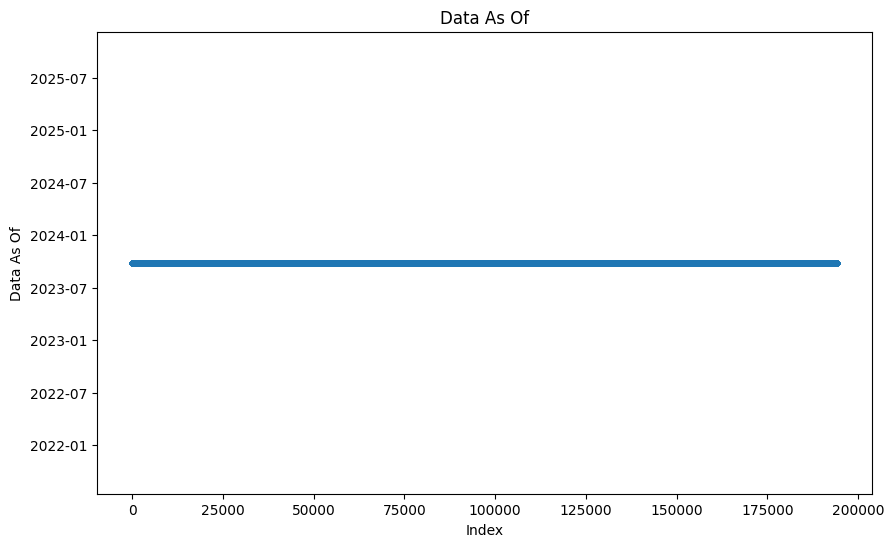

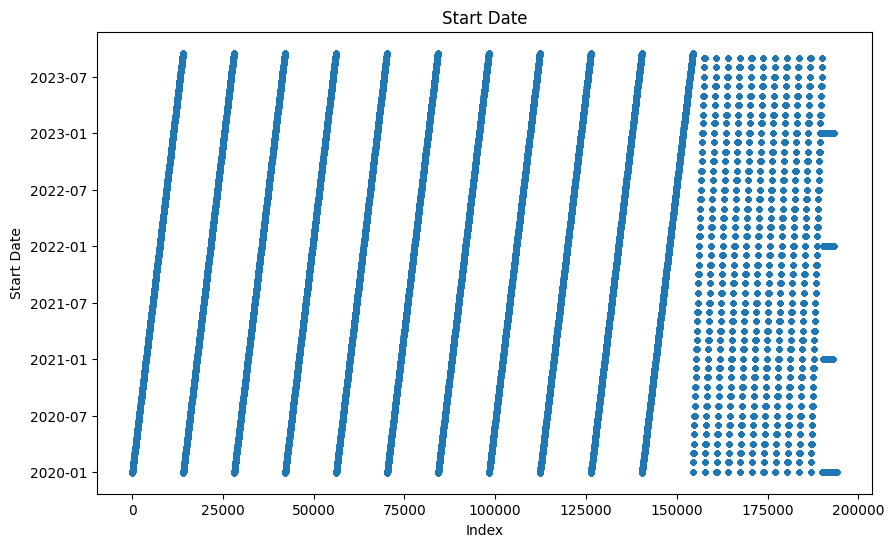

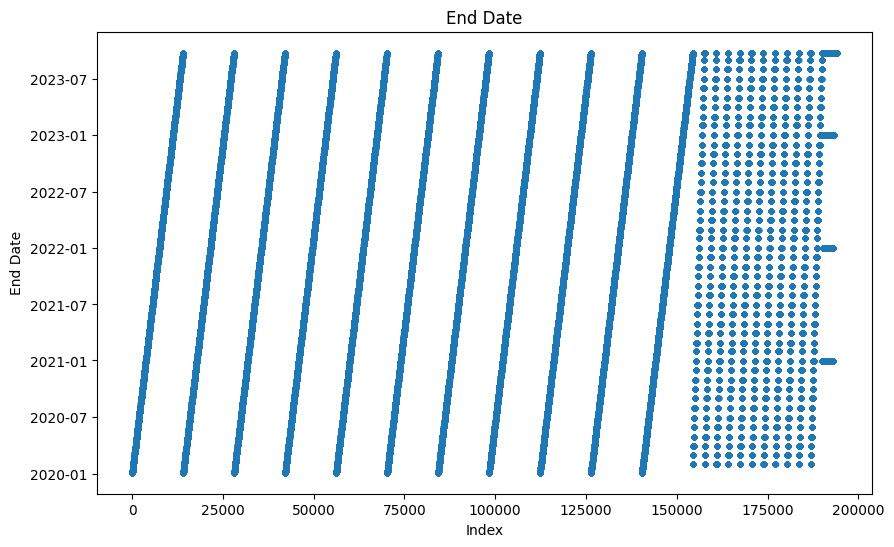

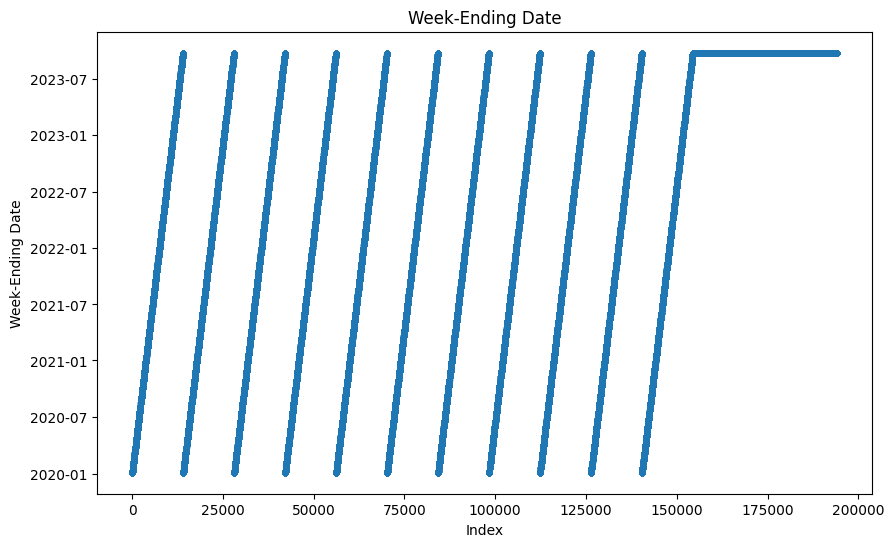

In [ ]:
import matplotlib.pyplot as plt

datetime_columns = ['Data As Of', 'Start Date', 'End Date', 'Week-Ending Date']

# Create scatter plots
for col in datetime_columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df.index, df[col], marker='o', s=10)
    plt.title(col)
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()


In [ ]:
df

,Data As Of,Start Date,End Date,Group,Year,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths
0,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,1,2020-01-04,0,Hispanic,0-4 years,0,104
1,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,1,2020-01-04,0,Hispanic,5-17 years,0,41
2,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,1,2020-01-04,0,Hispanic,18-29 years,0,190
3,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,1,2020-01-04,0,Hispanic,30-39 years,0,237
4,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,1,2020-01-04,0,Hispanic,40-49 years,0,325
...,...,...,...,...,...,...,...,...,...,...,...,...
194035,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,38,2023-09-23,10,Unknown,40-49 years,0,89
194036,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,38,2023-09-23,10,Unknown,50-64 years,19,457
194037,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,38,2023-09-23,10,Unknown,65-74 years,15,446
194038,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,38,2023-09-23,10,Unknown,75-84 years,17,243


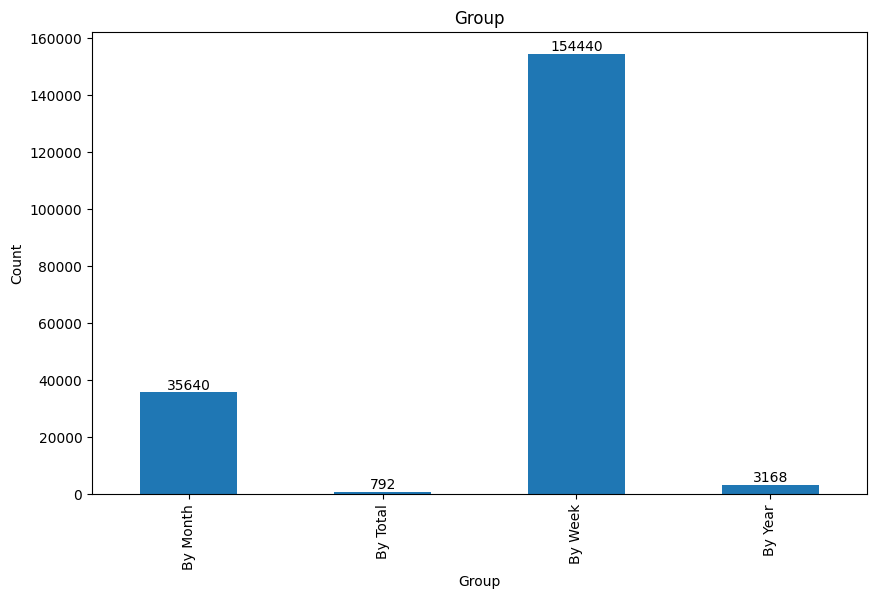

Counts for Group:
Group
By Month     35640
By Total       792
By Week     154440
By Year       3168
Name: count, dtype: int64



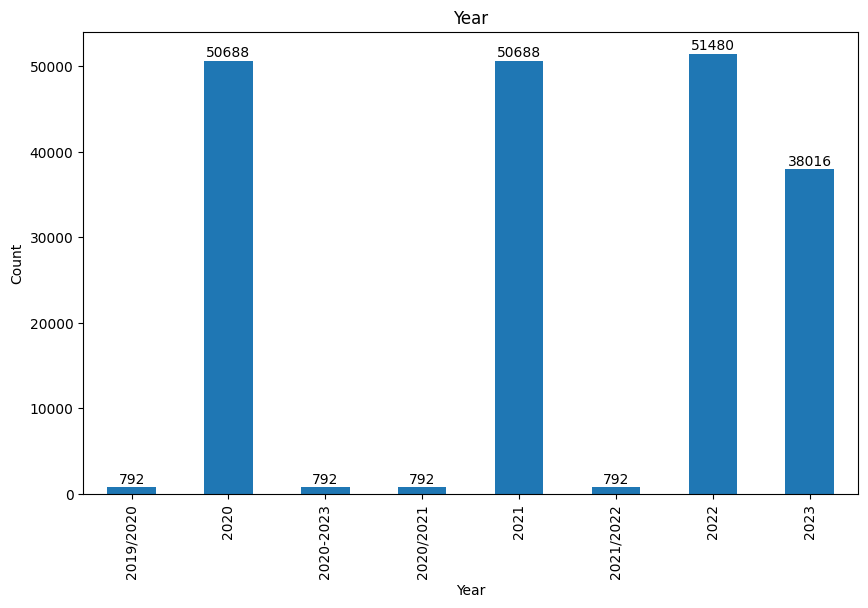

Counts for Year:
Year
2019/2020      792
2020         50688
2020-2023      792
2020/2021      792
2021         50688
2021/2022      792
2022         51480
2023         38016
Name: count, dtype: int64



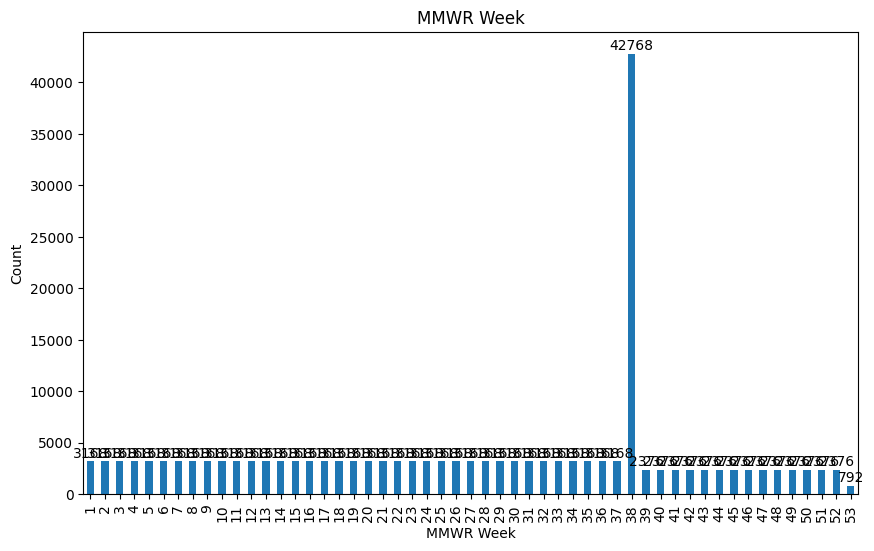

Counts for MMWR Week:
MMWR Week
1      3168
2      3168
3      3168
4      3168
5      3168
6      3168
7      3168
8      3168
9      3168
10     3168
11     3168
12     3168
13     3168
14     3168
15     3168
16     3168
17     3168
18     3168
19     3168
20     3168
21     3168
22     3168
23     3168
24     3168
25     3168
26     3168
27     3168
28     3168
29     3168
30     3168
31     3168
32     3168
33     3168
34     3168
35     3168
36     3168
37     3168
38    42768
39     2376
40     2376
41     2376
42     2376
43     2376
44     2376
45     2376
46     2376
47     2376
48     2376
49     2376
50     2376
51     2376
52     2376
53      792
Name: count, dtype: int64



In [ ]:
# Create count plots and print count separately

categorical_columns = ['Group', 'Year', 'MMWR Week']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    value_counts = df[col].value_counts().sort_index()
    value_counts.plot(kind='bar')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    for i, value in enumerate(value_counts):
        plt.text(i, value + 100, str(value), ha='center', va='bottom')
    plt.show()
    print(f"Counts for {col}:\n{value_counts}\n")


# What is the distribution of COVID-19 deaths across different demographic groups?

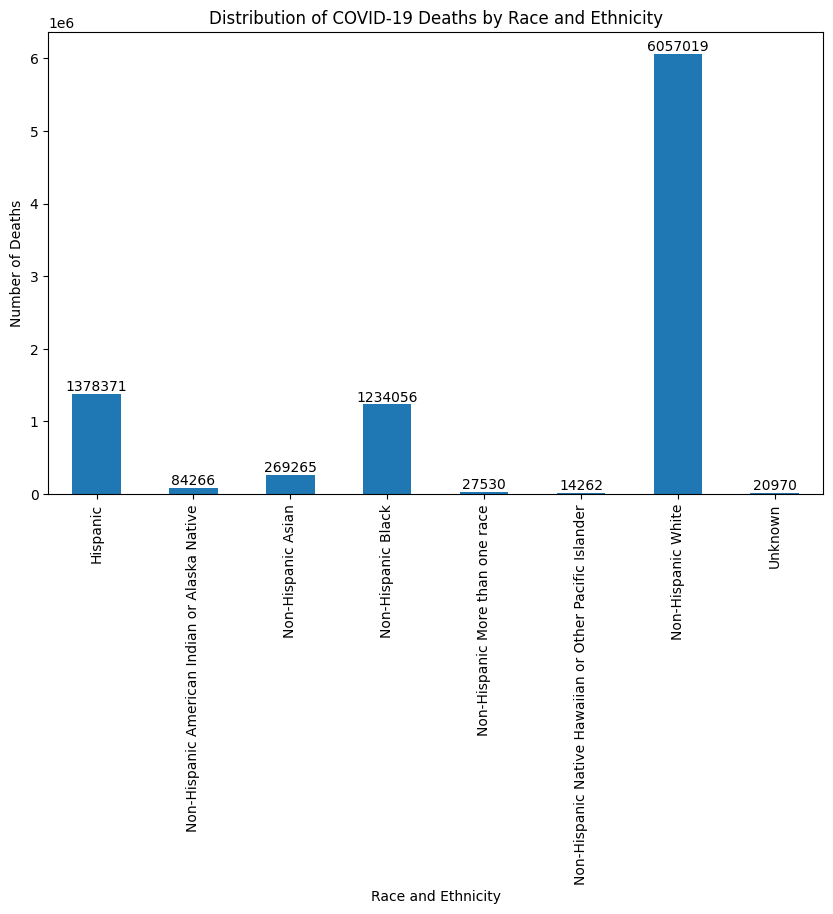

Counts of COVID-19 Deaths by Race and Ethnicity:
Race and Hispanic Origin Group
Hispanic                                                  1378371
Non-Hispanic American Indian or Alaska Native               84266
Non-Hispanic Asian                                         269265
Non-Hispanic Black                                        1234056
Non-Hispanic More than one race                             27530
Non-Hispanic Native Hawaiian or Other Pacific Islander      14262
Non-Hispanic White                                        6057019
Unknown                                                     20970
Name: COVID-19 Deaths, dtype: int64


In [ ]:
# Calculate the distribution of COVID-19 deaths across racial and ethnic groups
race_ethnicity_deaths = df.groupby('Race and Hispanic Origin Group')['COVID-19 Deaths'].sum()

# Plot the distribution
plt.figure(figsize=(10, 6))
race_ethnicity_deaths.plot(kind='bar')
plt.title('Distribution of COVID-19 Deaths by Race and Ethnicity')
plt.xlabel('Race and Ethnicity')
plt.ylabel('Number of Deaths')

# Add counts above each bar
for i, count in enumerate(race_ethnicity_deaths):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

# Print the counts separately
print("Counts of COVID-19 Deaths by Race and Ethnicity:")
print(race_ethnicity_deaths)


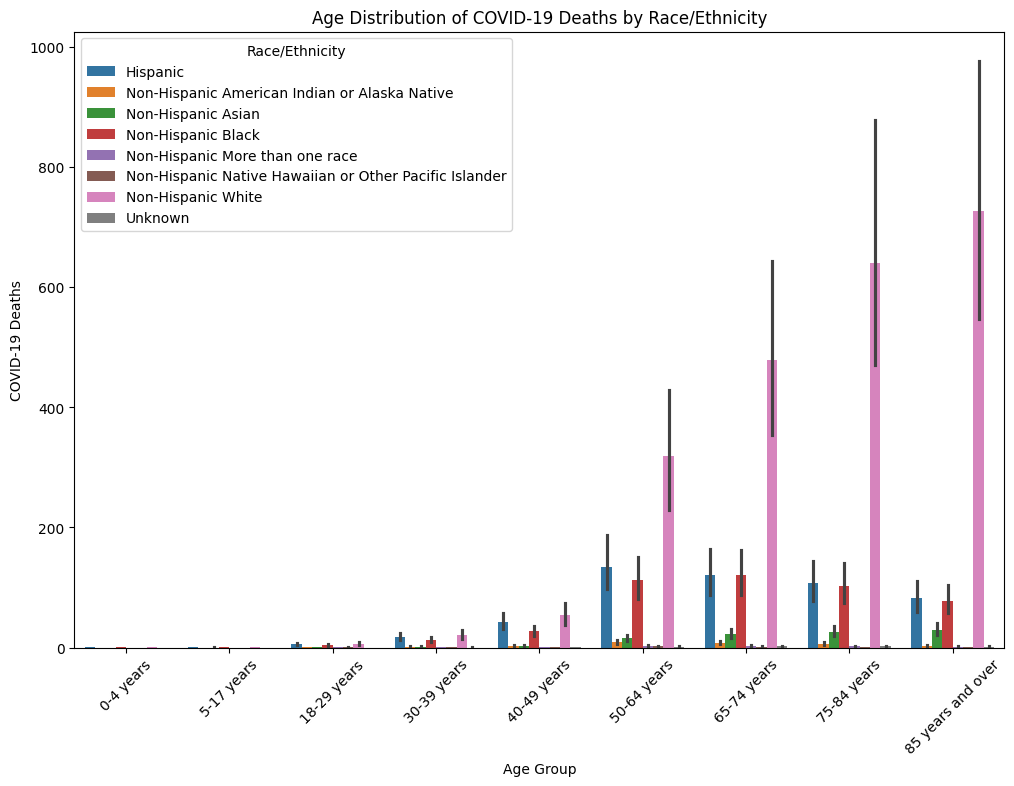

Counts of COVID-19 Deaths for Hispanic:
Age Group
0-4 years              1088
18-29 years           15496
30-39 years           46928
40-49 years          113697
5-17 years             1385
50-64 years          363369
65-74 years          325992
75-84 years          287810
85 years and over    222606
Name: COVID-19 Deaths, dtype: int64

Counts of COVID-19 Deaths for Non-Hispanic American Indian or Alaska Native:
Age Group
0-4 years               48
18-29 years           1203
30-39 years           3794
40-49 years           7211
5-17 years              68
50-64 years          24454
65-74 years          22399
75-84 years          16256
85 years and over     8833
Name: COVID-19 Deaths, dtype: int64

Counts of COVID-19 Deaths for Non-Hispanic Asian:
Age Group
0-4 years              108
18-29 years           1272
30-39 years           3888
40-49 years           8735
5-17 years             150
50-64 years          42243
65-74 years          61551
75-84 years          71022
85 years and over 

In [ ]:
import matplotlib.pyplot as plt

# Plot age distribution by race/ethnicity
plt.figure(figsize=(12, 8))
sns.barplot(x='Age Group', y='COVID-19 Deaths', hue='Race and Hispanic Origin Group', data=df)
plt.title('Age Distribution of COVID-19 Deaths by Race/Ethnicity')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=45)
plt.legend(title='Race/Ethnicity')
plt.show()

# Print counts separately for all races/ethnicities
race_age_group_counts = df.groupby(['Race and Hispanic Origin Group', 'Age Group'])['COVID-19 Deaths'].sum()

# Iterate over each racial/ethnic group and print the counts for each age group
for race_ethnicity in df['Race and Hispanic Origin Group'].unique():
    print(f"Counts of COVID-19 Deaths for {race_ethnicity}:")
    print(race_age_group_counts[race_ethnicity])
    print()


Age Distribution of COVID-19 Deaths:

Across all racial and ethnic groups, the majority of COVID-19 deaths occur in older age groups, particularly those aged 65 years and above.
The number of COVID-19 deaths tends to increase with age, with the highest counts observed in the oldest age groups.
Disparities among Racial and Ethnic Groups:

There are notable disparities in COVID-19 death counts among different racial and ethnic groups.
Non-Hispanic White individuals generally have the highest counts of COVID-19 deaths across all age groups, followed by Non-Hispanic Black individuals.
Hispanic individuals also have significant counts of COVID-19 deaths, particularly in older age groups.
Non-Hispanic Asian individuals tend to have lower counts of COVID-19 deaths compared to other racial and ethnic groups, but the disparity may vary across age groups.
Unknown Ethnicity:

The counts of COVID-19 deaths among individuals with unknown ethnicity are relatively low compared to other racial and ethnic groups, indicating potential gaps in reporting or data collection.

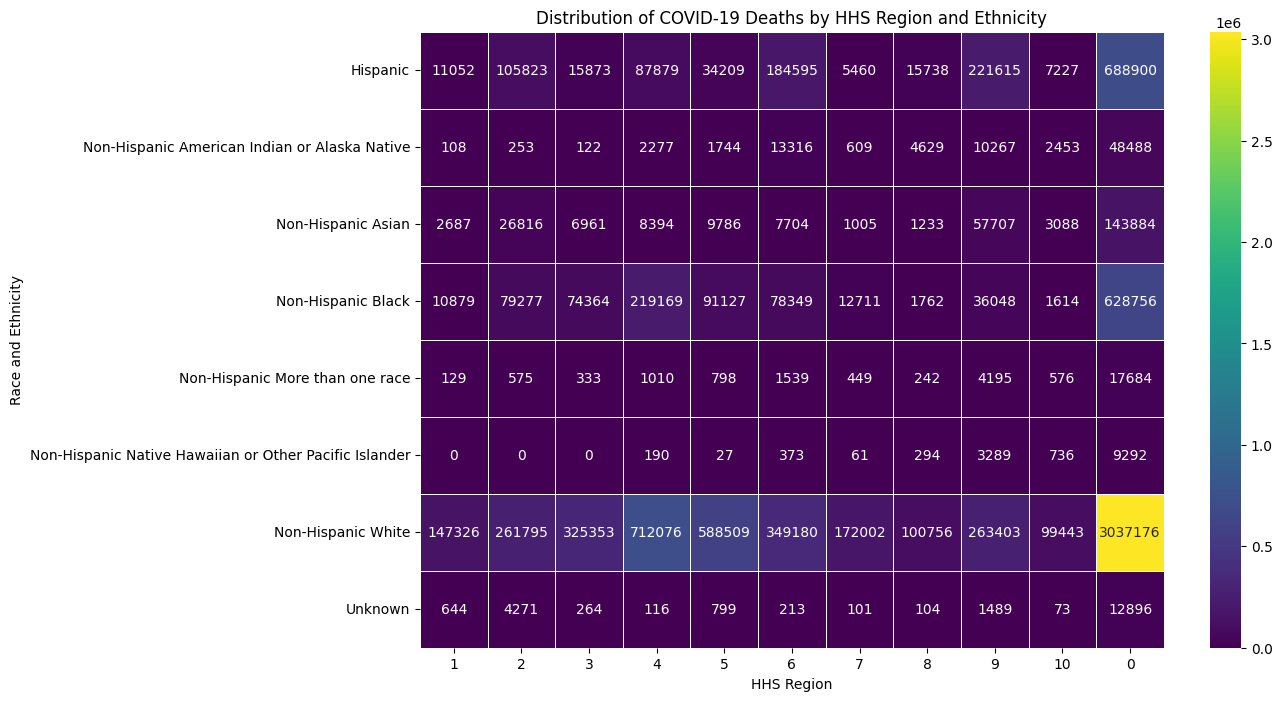

In [ ]:
import seaborn as sns

# Pivot the data to have HHS Region as columns, ethnicity as rows, and COVID-19 Deaths as values
pivot_table = df.pivot_table(index='Race and Hispanic Origin Group', columns='HHS Region', values='COVID-19 Deaths', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Distribution of COVID-19 Deaths by HHS Region and Ethnicity')
plt.xlabel('HHS Region')
plt.ylabel('Race and Ethnicity')
plt.show()


In [ ]:
# Display the pivot table with counts
print("Counts of COVID-19 Deaths by HHS Region and Ethnicity:")
pivot_table

Counts of COVID-19 Deaths by HHS Region and Ethnicity:


HHS Region,1,2,3,4,5,6,7,8,9,10,0
Race and Hispanic Origin Group,,,,,,,,,,,
Hispanic,11052,105823,15873,87879,34209,184595,5460,15738,221615,7227,688900
Non-Hispanic American Indian or Alaska Native,108,253,122,2277,1744,13316,609,4629,10267,2453,48488
Non-Hispanic Asian,2687,26816,6961,8394,9786,7704,1005,1233,57707,3088,143884
Non-Hispanic Black,10879,79277,74364,219169,91127,78349,12711,1762,36048,1614,628756
Non-Hispanic More than one race,129,575,333,1010,798,1539,449,242,4195,576,17684
Non-Hispanic Native Hawaiian or Other Pacific Islander,0,0,0,190,27,373,61,294,3289,736,9292
Non-Hispanic White,147326,261795,325353,712076,588509,349180,172002,100756,263403,99443,3037176
Unknown,644,4271,264,116,799,213,101,104,1489,73,12896


--> (Classes :
- Region 0 : United States,

- Region 1: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont;

- Region 2: New Jersey, New York, New York City, Puerto Rico;

- Region 3: Delaware, District of Columbia, Maryland, Pennsylvania, Virginia, West Virginia;

- Region 4: Alabama, Florida, Georgia, Kentucky, Mississippi, North Carolina, South Carolina, Tennessee;

- Region 5: Illinois, Indiana, Michigan, Minnesota, Ohio, Wisconsin;

- Region 6: Arkansas, Louisiana, New Mexico, Oklahoma, Texas;

- Region 7: Iowa, Kansas, Missouri, Nebraska;

- Region 8: Colorado, Montana, North Dakota, South Dakota, Utah, Wyoming;

- Region 9: Arizona, California, Hawaii, Nevada;

- Region 10: Alaska, Idaho, Oregon, Washington. )

#Regional Disparity

- HHS Region 4 has the highest counts of COVID-19 deaths across most ethnic groups, followed by HHS Region 5 and HHS Region 6.

- HHS Region 10 generally has lower counts of COVID-19 deaths compared to other regions.

#Ethnic Disparities within Regions

- Non-Hispanic Black individuals have relatively high counts of COVID-19 deaths in most regions, particularly in HHS Region 4.
- Hispanic individuals also have significant counts of COVID-19 deaths, with notable numbers in HHS Region 5 and HHS Region 6.
- Non-Hispanic White individuals tend to have higher counts of COVID-19 deaths in regions like HHS Region 4 and HHS Region 5.
- Counts for Non-Hispanic Asian and Non-Hispanic American Indian or Alaska Native individuals vary across regions but generally tend to be lower compared to other ethnic groups.

# Relative Magnitudes:
- Looking at the total counts, it's evident that Non-Hispanic White individuals have the highest overall counts of COVID-19 deaths across all HHS regions, followed by Hispanic individuals and Non-Hispanic Black individuals.

In [ ]:
unique_values = df['Race and Hispanic Origin Group'].unique()
print(unique_values)

['Hispanic' 'Non-Hispanic American Indian or Alaska Native'
 'Non-Hispanic Asian' 'Non-Hispanic Black'
 'Non-Hispanic More than one race'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander'
 'Non-Hispanic White' 'Unknown']


In [ ]:
df

,Data As Of,Start Date,End Date,Group,Year,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths
0,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,1,2020-01-04,0,Hispanic,0-4 years,0,104
1,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,1,2020-01-04,0,Hispanic,5-17 years,0,41
2,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,1,2020-01-04,0,Hispanic,18-29 years,0,190
3,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,1,2020-01-04,0,Hispanic,30-39 years,0,237
4,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,1,2020-01-04,0,Hispanic,40-49 years,0,325
...,...,...,...,...,...,...,...,...,...,...,...,...
194035,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,38,2023-09-23,10,Unknown,40-49 years,0,89
194036,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,38,2023-09-23,10,Unknown,50-64 years,19,457
194037,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,38,2023-09-23,10,Unknown,65-74 years,15,446
194038,2023-09-27,2020-01-01,2023-09-23,By Total,2020-2023,38,2023-09-23,10,Unknown,75-84 years,17,243


In [ ]:
# Assuming your DataFrame is named 'data'
race_counts = data['Race and Hispanic Origin Group'].value_counts()
print("Count of each race:")
print(race_counts)

Count of each race:
Race and Hispanic Origin Group
0    24255
1    24255
2    24255
3    24255
4    24255
5    24255
6    24255
7    24255
Name: count, dtype: int64


In [ ]:
# Print unique classes in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Data As Of':
<DatetimeArray>
['2023-09-27 00:00:00']
Length: 1, dtype: datetime64[ns]

Unique values in column 'Start Date':
<DatetimeArray>
['2019-12-29 00:00:00', '2020-01-05 00:00:00', '2020-01-12 00:00:00',
 '2020-01-19 00:00:00', '2020-01-26 00:00:00', '2020-02-02 00:00:00',
 '2020-02-09 00:00:00', '2020-02-16 00:00:00', '2020-02-23 00:00:00',
 '2020-03-01 00:00:00',
 ...
 '2022-11-01 00:00:00', '2022-12-01 00:00:00', '2023-02-01 00:00:00',
 '2023-03-01 00:00:00', '2023-04-01 00:00:00', '2023-05-01 00:00:00',
 '2023-06-01 00:00:00', '2023-07-01 00:00:00', '2023-08-01 00:00:00',
 '2023-09-01 00:00:00']
Length: 235, dtype: datetime64[ns]

Unique values in column 'End Date':
<DatetimeArray>
['2020-01-04 00:00:00', '2020-01-11 00:00:00', '2020-01-18 00:00:00',
 '2020-01-25 00:00:00', '2020-02-01 00:00:00', '2020-02-08 00:00:00',
 '2020-02-15 00:00:00', '2020-02-22 00:00:00', '2020-02-29 00:00:00',
 '2020-03-07 00:00:00',
 ...
 '2022-10-31 00:00:00', '2022-11-3

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Race and Hispanic Origin Group'] = label_encoder.fit_transform(data['Race and Hispanic Origin Group'])
data['Age Group'] = label_encoder.fit_transform(data['Age Group'])
data['Group'] = label_encoder.fit_transform(data['Group'])
data

,Start Date,End Date,Group,Year,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths
0,2019-12-29,2020-01-04,2,2019/2020,1,2020-01-04,0,0,0,0,104
1,2019-12-29,2020-01-04,2,2019/2020,1,2020-01-04,0,0,4,0,41
2,2019-12-29,2020-01-04,2,2019/2020,1,2020-01-04,0,0,1,0,190
3,2019-12-29,2020-01-04,2,2019/2020,1,2020-01-04,0,0,2,0,237
4,2019-12-29,2020-01-04,2,2019/2020,1,2020-01-04,0,0,3,0,325
...,...,...,...,...,...,...,...,...,...,...,...
194035,2020-01-01,2023-09-23,1,2020-2023,38,2023-09-23,10,7,3,0,89
194036,2020-01-01,2023-09-23,1,2020-2023,38,2023-09-23,10,7,5,19,457
194037,2020-01-01,2023-09-23,1,2020-2023,38,2023-09-23,10,7,6,15,446
194038,2020-01-01,2023-09-23,1,2020-2023,38,2023-09-23,10,7,7,17,243


In [ ]:
# Mixture Learning Scheme
X_mix = data.drop(columns=['COVID-19 Deaths','Start Date', 'End Date','Year', 'Week-Ending Date', ])
y_mix = data['COVID-19 Deaths']
X_mix_train, X_mix_test, y_mix_train, y_mix_test = train_test_split(X_mix, y_mix, test_size=0.2, random_state=42)

model_mix = GradientBoostingRegressor()  # Choose any model
model_mix.fit(X_mix_train, y_mix_train)
y_mix_pred = model_mix.predict(X_mix_test)
mix_rmse = mean_squared_error(y_mix_test, y_mix_pred, squared=False)
print("Mixture Learning RMSE:", mix_rmse)


Mixture Learning RMSE: 406.0716060623727


The overall RMSE value for the mixture learning scheme is 406.07, which is higher than the RMSE values of some individual ethnic groups in the independent learning scheme.

In [ ]:
# Independent Learning Scheme
ethnic_groups = data['Race and Hispanic Origin Group'].unique()
for group in ethnic_groups:
    group_data = data[data['Race and Hispanic Origin Group'] == group]
    X_group = group_data.drop(columns=['COVID-19 Deaths','Start Date', 'End Date','Year', 'Week-Ending Date'])
    y_group = group_data['COVID-19 Deaths']
    X_group_train, X_group_test, y_group_train, y_group_test = train_test_split(X_group, y_group, test_size=0.2, random_state=42)

    model_group = GradientBoostingRegressor()  # Choose any model
    model_group.fit(X_group_train, y_group_train)
    y_group_pred = model_group.predict(X_group_test)
    group_rmse = mean_squared_error(y_group_test, y_group_pred, squared=False)
    print(f"Independent Learning RMSE for {group}:", group_rmse)

Independent Learning RMSE for 0: 172.74848195897692
Independent Learning RMSE for 1: 15.16618098442474
Independent Learning RMSE for 2: 52.1330147005161
Independent Learning RMSE for 3: 111.7448059260064
Independent Learning RMSE for 4: 3.406019320722873
Independent Learning RMSE for 5: 4.519149986864198
Independent Learning RMSE for 6: 910.4517464802346
Independent Learning RMSE for 7: 5.087558899956792


Ethnic groups 1, 4, and 5 have relatively low RMSE values (15.17, 3.41, and 4.52, respectively), suggesting that the model performs well in predicting COVID-19 deaths for these groups.

Ethnic groups 2 and 3 have moderate RMSE values (52.13 and 111.74, respectively), indicating that the model's predictions for these groups have a higher level of error compared to groups 1, 4, and 5.

Ethnic groups 0, 6, and 7 have high RMSE values (172.75, 910.45, and 5.09, respectively), indicating that the model's predictions for these groups are less accurate compared to the other groups.

Independent Learning Scheme:
Mean RMSE: 159.4075
Median RMSE: 33.65
Standard Deviation RMSE: 289.60473419602454
Range of RMSE: 907.0400000000001

Mixture Learning Scheme:
RMSE: 406.07


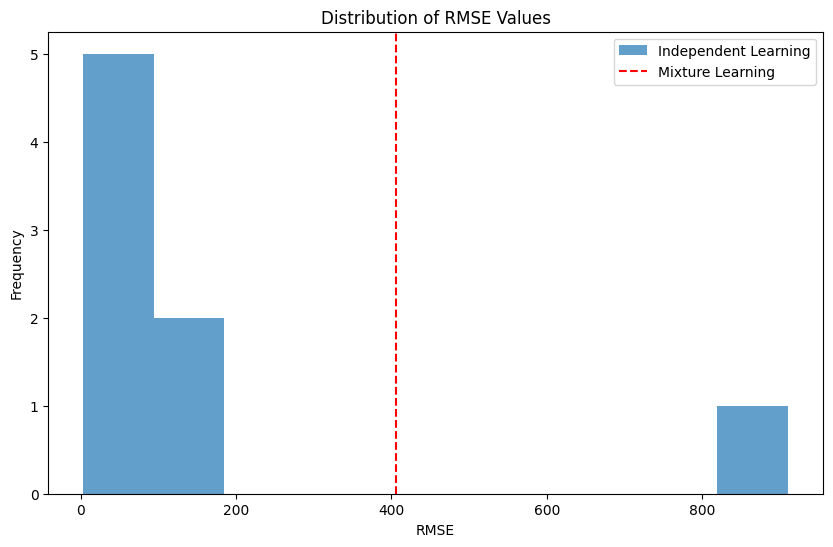

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# RMSE values for independent learning scheme
independent_rmse = np.array([172.75, 15.17, 52.13, 111.74, 3.41, 4.52, 910.45, 5.09])

# RMSE value for mixture learning scheme
mixture_rmse = 406.07

# Summary statistics for independent learning scheme
independent_mean = np.mean(independent_rmse)
independent_median = np.median(independent_rmse)
independent_std = np.std(independent_rmse)
independent_range = np.max(independent_rmse) - np.min(independent_rmse)

# Print summary statistics
print("Independent Learning Scheme:")
print(f"Mean RMSE: {independent_mean}")
print(f"Median RMSE: {independent_median}")
print(f"Standard Deviation RMSE: {independent_std}")
print(f"Range of RMSE: {independent_range}")

# Print RMSE value for mixture learning scheme
print("\nMixture Learning Scheme:")
print(f"RMSE: {mixture_rmse}")

# Visualize the distribution of RMSE values
plt.figure(figsize=(10, 6))
plt.hist(independent_rmse, bins=10, alpha=0.7, label='Independent Learning')
plt.axvline(x=mixture_rmse, color='red', linestyle='--', label='Mixture Learning')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('Distribution of RMSE Values')
plt.legend()
plt.show()


In [ ]:
# Transfer Learning Scheme
majority_group = 'Non-Hispanic White'
majority_data = data[data['Race and Hispanic Origin Group'] == majority_group]
X_majority = majority_data.drop(columns=['COVID-19 Deaths'])
y_majority = majority_data['COVID-19 Deaths']
X_majority_train, X_majority_test, y_majority_train, y_majority_test = train_test_split(X_majority, y_majority, test_size=0.2, random_state=42)

model_transfer = GradientBoostingRegressor()  # Choose any model
model_transfer.fit(X_majority_train, y_majority_train)

minority_groups = ethnic_groups[ethnic_groups != majority_group]
for group in minority_groups:
    group_data = data[data['Race and Hispanic Origin Group'] == group]
    X_group = group_data.drop(columns=['COVID-19 Deaths'])
    y_group = group_data['COVID-19 Deaths']

    # Use the trained model to predict for minority groups
    y_group_pred = model_transfer.predict(X_group)
    group_rmse = mean_squared_error(y_group, y_group_pred, squared=False)
    print(f"Transfer Learning RMSE for {group}:", group_rmse)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Find minority and majority groups
ethnic_group_counts = data['Race and Hispanic Origin Group'].value_counts()
minority_group = ethnic_group_counts.idxmin()
majority_group = ethnic_group_counts.idxmax()

# Train model on majority group's data
majority_data = data[data['Race and Hispanic Origin Group'] == majority_group]
X_majority = majority_data.drop(columns=['COVID-19 Deaths', 'Start Date', 'End Date', 'Year', 'Week-Ending Date'])
y_majority = majority_data['COVID-19 Deaths']
X_majority_train, X_majority_test, y_majority_train, y_majority_test = train_test_split(X_majority, y_majority, test_size=0.2, random_state=42)

model_majority = GradientBoostingRegressor()
model_majority.fit(X_majority_train, y_majority_train)

# Transfer knowledge to minority groups
for group in data['Race and Hispanic Origin Group'].unique():
    if group != majority_group:
        minority_data = data[data['Race and Hispanic Origin Group'] == group]
        X_minority = minority_data.drop(columns=['COVID-19 Deaths', 'Start Date', 'End Date', 'Year', 'Week-Ending Date'])
        y_minority = minority_data['COVID-19 Deaths']
        X_minority_train, X_minority_test, y_minority_train, y_minority_test = train_test_split(X_minority, y_minority, test_size=0.2, random_state=42)

        # Use knowledge transfer from majority group
        y_majority_pred = model_majority.predict(X_minority_test)
        minority_rmse = mean_squared_error(y_minority_test, y_majority_pred, squared=False)
        print(f"Transfer Learning RMSE for {group}: {minority_rmse}")


Transfer Learning RMSE for 1: 29.29607977721638
Transfer Learning RMSE for 2: 50.48957689804763
Transfer Learning RMSE for 3: 336.803263594373
Transfer Learning RMSE for 4: 15.311465997715922
Transfer Learning RMSE for 5: 6.658942354905979
Transfer Learning RMSE for 6: 1487.461614537069
Transfer Learning RMSE for 7: 27.98353624700487


In [ ]:
ethnic_group_counts

Race and Hispanic Origin Group
0    24255
1    24255
2    24255
3    24255
4    24255
5    24255
6    24255
7    24255
Name: count, dtype: int64

In [ ]:
X_group

,Group,MMWR Week,HHS Region,Race and Hispanic Origin Group,Age Group,Total Deaths
63,2,1,0,7,0,2
64,2,1,0,7,4,2
65,2,1,0,7,1,3
66,2,1,0,7,2,6
67,2,1,0,7,3,9
...,...,...,...,...,...,...
194035,1,38,10,7,3,89
194036,1,38,10,7,5,457
194037,1,38,10,7,6,446
194038,1,38,10,7,7,243


In [ ]:
X_train

In [ ]:
import seaborn as sns

# Plot MAE scores
plt.figure(figsize=(12, 8))
sns.barplot(x=race_groups, y=mae_scores, palette="viridis")
plt.xlabel('Race or Ethnicity Group')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Each Race or Ethnicity Group')
plt.xticks(rotation=45)
plt.show()



# Plot distribution of COVID-19 deaths
plt.figure(figsize=(10, 6))
sns.histplot(y_test, bins=20, kde=True, color='skyblue', label='Actual')
sns.histplot(regression_model.predict(X_test), bins=20, kde=True, color='orange', label='Predicted')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted COVID-19 Deaths')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, regression_model.predict(X_test))
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, regression_model.predict(X_test))
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, regression_model.predict(X_test))
print("R-squared (R2):", r2)


In [ ]:
race_age_deaths = newdf.groupby(['Race and Hispanic Origin Group', 'Age Group'])['COVID-19 Deaths'].sum().unstack()

# Step 3: Visualization
# Bar plot for COVID-19 deaths by race and age group
race_age_deaths.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('COVID-19 Deaths by Race and Age Group')
plt.xlabel('Race and Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.legend(title='Age Group', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import f_oneway

# List of racial groups
racial_groups = ['Hispanic', 'Non-Hispanic American Indian or Alaska Native',
                 'Non-Hispanic Asian', 'Non-Hispanic Black',
                 'Non-Hispanic More than one race',
                 'Non-Hispanic Native Hawaiian or Other Pacific Islander',
                 'Non-Hispanic White', 'Unknown']

# Extracting COVID-19 deaths for each racial group
deaths_by_group = [newdf[newdf['Race and Hispanic Origin Group'] == group]['COVID-19 Deaths'] for group in racial_groups]

# Performing ANOVA test
f_statistic, p_value = f_oneway(*deaths_by_group)

# Print the results
print("ANOVA Test Results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)


ANOVA Test Results:
F-statistic: 139.10143935931976
P-value: 1.9232893206638702e-205


# Descriptive Stats

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'

# Define the ethnicities you want to focus on
ethnicities_of_interest = [
    'Hispanic',
    'Non-Hispanic American Indian or Alaska Native',
    'Non-Hispanic Asian',
    'Non-Hispanic Black',
    'Non-Hispanic Native Hawaiian or Other Pacific Islander',
    'Non-Hispanic White',
    'Unknown'
]

# Filter the dataset to include only the rows corresponding to these ethnicities
filtered_df = newdf[newdf['Race and Hispanic Origin Group'].isin(ethnicities_of_interest)]

# Group the filtered data by ethnicity
grouped_df = filtered_df.groupby('Race and Hispanic Origin Group')

# Calculate descriptive statistics for COVID-19 deaths for each ethnic group
descriptive_stats = grouped_df['COVID-19 Deaths'].describe()

# Display the calculated statistics
descriptive_stats


,count,mean,std,min,25%,50%,75%,max
Race and Hispanic Origin Group,,,,,,,,
Hispanic,24255.0,56.828324,659.623745,0.0,0.0,0.0,11.0,45356.0
Non-Hispanic American Indian or Alaska Native,24255.0,3.474170,46.131213,0.0,0.0,0.0,0.0,3385.0
Non-Hispanic Asian,24255.0,11.101422,147.238732,0.0,0.0,0.0,0.0,10525.0
Non-Hispanic Black,24255.0,50.878417,602.007930,0.0,0.0,0.0,10.0,41225.0
Non-Hispanic Native Hawaiian or Other Pacific Islander,24255.0,0.588002,9.468801,0.0,0.0,0.0,0.0,765.0
Non-Hispanic White,24255.0,249.722490,3049.091834,0.0,0.0,0.0,59.0,244841.0
Unknown,24255.0,0.864564,13.748762,0.0,0.0,0.0,0.0,939.0


- Magnitude: Non-Hispanic White group has the highest mean (249.72), while Non-Hispanic Native Hawaiian or Other Pacific Islander has the lowest (0.59).

- Disparities: Substantial differences exist among groups, with Non-Hispanic White showing higher mean deaths.

- Variability: Non-Hispanic White group exhibits considerable variability (std: 3049.09), indicating diverse impacts within the group.

- Low Deaths: Some groups, like Non-Hispanic American Indian or Alaska Native, report zero or low median deaths.

- Outliers: Presence of outliers is evident, such as the maximum of 244,841 deaths in the Non-Hispanic White group

# Independent Learning:
Independent learning aims to learn separate models for different subsets of data. In the context of racial and ethnic groups, you can train individual models for each group separately. This allows each model to focus on learning patterns specific to that group, potentially improving performance for underrepresented groups.

In [ ]:
df_encoded = pd.get_dummies(newdf, columns=["Race and Hispanic Origin Group"])
df_encoded

,Start Date,End Date,Group,Year,MMWR Week,Week-Ending Date,HHS Region,Age Group,COVID-19 Deaths,Total Deaths,Mortality Rate,Race and Hispanic Origin Group_Hispanic,Race and Hispanic Origin Group_Non-Hispanic American Indian or Alaska Native,Race and Hispanic Origin Group_Non-Hispanic Asian,Race and Hispanic Origin Group_Non-Hispanic Black,Race and Hispanic Origin Group_Non-Hispanic More than one race,Race and Hispanic Origin Group_Non-Hispanic Native Hawaiian or Other Pacific Islander,Race and Hispanic Origin Group_Non-Hispanic White,Race and Hispanic Origin Group_Unknown
0,2019-12-29,2020-01-04,2,0,1,2020-01-04,0,0-4 years,0,104,0.0%,True,False,False,False,False,False,False,False
1,2019-12-29,2020-01-04,2,0,1,2020-01-04,0,5-17 years,0,41,0.0%,True,False,False,False,False,False,False,False
2,2019-12-29,2020-01-04,2,0,1,2020-01-04,0,18-29 years,0,190,0.0%,True,False,False,False,False,False,False,False
3,2019-12-29,2020-01-04,2,0,1,2020-01-04,0,30-39 years,0,237,0.0%,True,False,False,False,False,False,False,False
4,2019-12-29,2020-01-04,2,0,1,2020-01-04,0,40-49 years,0,325,0.0%,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194035,2020-01-01,2023-09-23,1,2,38,2023-09-23,10,40-49 years,0,89,0.0%,False,False,False,False,False,False,False,True
194036,2020-01-01,2023-09-23,1,2,38,2023-09-23,10,50-64 years,19,457,4.16%,False,False,False,False,False,False,False,True
194037,2020-01-01,2023-09-23,1,2,38,2023-09-23,10,65-74 years,15,446,3.36%,False,False,False,False,False,False,False,True
194038,2020-01-01,2023-09-23,1,2,38,2023-09-23,10,75-84 years,17,243,7.0%,False,False,False,False,False,False,False,True


In [ ]:
# Split the data into features (X) and target (y)
X = df_encoded.drop(columns=["Week-Ending Date", "Start Date", "End Date", "Year", "COVID-19 Deaths", "Total Deaths", "Mortality Rate"])
y = df_encoded["COVID-19 Deaths"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
label_encoder = LabelEncoder()
X["Age Group"] = label_encoder.fit_transform(X["Age Group"])

In [ ]:
X

,Group,MMWR Week,HHS Region,Age Group,Race and Hispanic Origin Group_Hispanic,Race and Hispanic Origin Group_Non-Hispanic American Indian or Alaska Native,Race and Hispanic Origin Group_Non-Hispanic Asian,Race and Hispanic Origin Group_Non-Hispanic Black,Race and Hispanic Origin Group_Non-Hispanic More than one race,Race and Hispanic Origin Group_Non-Hispanic Native Hawaiian or Other Pacific Islander,Race and Hispanic Origin Group_Non-Hispanic White,Race and Hispanic Origin Group_Unknown
0,2,1,0,0,True,False,False,False,False,False,False,False
1,2,1,0,4,True,False,False,False,False,False,False,False
2,2,1,0,1,True,False,False,False,False,False,False,False
3,2,1,0,2,True,False,False,False,False,False,False,False
4,2,1,0,3,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
194035,1,38,10,3,False,False,False,False,False,False,False,True
194036,1,38,10,5,False,False,False,False,False,False,False,True
194037,1,38,10,6,False,False,False,False,False,False,False,True
194038,1,38,10,7,False,False,False,False,False,False,False,True
